**Inital imports**

In [344]:
import pandas as pd
import numpy as np

**Intial Sleep Data Inspection**

In [345]:
df = pd.read_csv("data/May14.csv", header=None, names=["Metric", "Value"])
df.head()

,Metric,Value
0,Sleep Score 1 Day,NaN
1,Date,2025-05-14
2,Sleep Duration,7h 55m
3,Sleep Score,86
4,Quality,Good


In [346]:
df.dtypes

Metric    object
Value     object
dtype: object

**Rotation of the Columns and rows**

In [347]:
df_wide = df.set_index("Metric").T
print(df_wide.dtypes)
df_wide.index = pd.to_datetime(df_wide.loc[:, "Date"])
df_wide = df_wide.drop(columns="Date")
df_wide.head()

Metric
Sleep Score 1 Day         object
Date                      object
Sleep Duration            object
Sleep Score               object
Quality                   object
Sleep Score Factors       object
Sleep Duration            object
Stress Avg                object
Deep Sleep Duration       object
Light Sleep Duration      object
REM Duration              object
Awake Time                object
Sleep Timeline Metrics    object
Restless Moments          object
Resting Heart Rate        object
Body Battery Change       object
Avg SpO₂                  object
Lowest SpO2               object
Avg Respiration           object
Lowest Respiration        object
Avg Overnight HRV         object
7d Avg HRV                object
dtype: object


Metric,Sleep Score 1 Day,Sleep Duration,Sleep Score,Quality,Sleep Score Factors,Sleep Duration,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,...,Sleep Timeline Metrics,Restless Moments,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
Date,,,,,,,,,,,,,,,,,,,,,
2025-05-14,NaN,7h 55m,86,Good,NaN,7h 55m,20,1h 54m,4h 27m,1h 34m,...,NaN,34,50 bpm,+79,95%,85%,14 brpm,12 brpm,82 ms,Low


**Cleansing of the dataset**

In [348]:
print(df_wide.isnull().sum())
df_wide = df_wide.drop(columns=['Sleep Score 1 Day', 'Sleep Score Factors', 'Sleep Timeline Metrics'])
df_wide.head()

Metric
Sleep Score 1 Day         1
Sleep Duration            0
Sleep Score               0
Quality                   0
Sleep Score Factors       1
Sleep Duration            0
Stress Avg                0
Deep Sleep Duration       0
Light Sleep Duration      0
REM Duration              0
Awake Time                0
Sleep Timeline Metrics    1
Restless Moments          0
Resting Heart Rate        0
Body Battery Change       0
Avg SpO₂                  0
Lowest SpO2               0
Avg Respiration           0
Lowest Respiration        0
Avg Overnight HRV         0
7d Avg HRV                0
dtype: int64


Metric,Sleep Duration,Sleep Score,Quality,Sleep Duration,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Restless Moments,Resting Heart Rate,Body Battery Change,Avg SpO₂,Lowest SpO2,Avg Respiration,Lowest Respiration,Avg Overnight HRV,7d Avg HRV
Date,,,,,,,,,,,,,,,,,,
2025-05-14,7h 55m,86,Good,7h 55m,20,1h 54m,4h 27m,1h 34m,13m,34,50 bpm,+79,95%,85%,14 brpm,12 brpm,82 ms,Low


**Importing of all of the data files concatinating and performing data cleanse**

In [349]:
import glob
file_paths = glob.glob("data/*.csv")
frames = []
count = 0
for path in file_paths:
    df_bulk = pd.read_csv(path, header=None, names=["Metric", "Value"])
    df_bulk = df_bulk.set_index("Metric").T
    date = df_bulk.loc["Value", "Date"]
    df_bulk.index = pd.to_datetime([date])
    df_bulk = df_bulk.loc[:, ~df_bulk.columns.duplicated()]

    df_bulk = df_bulk.drop(
        columns=[
            'Date',
            'Sleep Score 1 Day',
            'Sleep Score Factors',
            'Sleep Timeline Metrics',
            'Total Sleep Duration',
            'Sleep 1 Day'], errors='ignore'
        )
  
    frames.append(df_bulk)

Bigdf = pd.concat(frames, axis=0).reset_index()
Bigdf = Bigdf.rename(columns={'index': 'WorkoutDate'})
    
Bigdf.dtypes

Metric
WorkoutDate             datetime64[ns]
Sleep Duration                  object
Sleep Score                     object
Quality                         object
Stress Avg                      object
Deep Sleep Duration             object
Light Sleep Duration            object
REM Duration                    object
Awake Time                      object
Restless Moments                object
Resting Heart Rate              object
Body Battery Change             object
Avg SpO₂                        object
Lowest SpO2                     object
Avg Respiration                 object
Lowest Respiration              object
Avg Overnight HRV               object
7d Avg HRV                      object
dtype: object

**Importing and cleansing data from Workouts**

In [350]:
df = pd.read_csv("data/workoutdata/workouts_todec1.csv")
df_workouts = df.drop(columns=[
    'Title',
'WorkoutDescription',
'PlannedDistanceInMeters',
'CoachComments',
'PowerMax',
'Energy',
'AthleteComments',
'CadenceMax',
'HeartRateMax',
'TorqueAverage',
'TorqueMax',
'HRZone1Minutes',
'HRZone2Minutes',
'HRZone3Minutes',
'HRZone4Minutes',
'HRZone5Minutes',
'HRZone6Minutes',
'HRZone7Minutes',
'HRZone8Minutes',
'HRZone9Minutes',
'HRZone10Minutes',
'PWRZone1Minutes',
'PWRZone2Minutes',
'PWRZone3Minutes',
'PWRZone4Minutes',
'PWRZone5Minutes',
'PWRZone6Minutes',
'PWRZone7Minutes',
'PWRZone8Minutes',
'PWRZone9Minutes',
'PWRZone10Minutes',
])
display(df_workouts)

,WorkoutType,PlannedDuration,WorkoutDay,DistanceInMeters,PowerAverage,TimeTotalInHours,VelocityAverage,VelocityMax,CadenceAverage,HeartRateAverage,IF,TSS,Rpe,Feeling
0,Run,0.424167,2024-12-01,3070.370117,NaN,0.417913,2.041000,NaN,141.0,129.0,0.491319,10.93,NaN,NaN
1,Bike,1.250000,2024-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Swim,NaN,2024-12-02,900.000000,NaN,0.292065,0.850662,NaN,54.0,NaN,0.847415,17.77,NaN,NaN
3,Strength,0.500000,2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Run,0.720833,2024-12-03,8514.309570,NaN,0.793026,2.982000,NaN,161.0,149.0,0.687992,41.34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Other,NaN,2025-05-22,NaN,NaN,0.152719,NaN,NaN,NaN,97.0,0.579974,5.43,NaN,NaN
306,Bike,1.333333,2025-05-23,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,Swim,NaN,2025-05-23,1300.000000,NaN,0.380390,0.938628,NaN,56.0,NaN,0.939825,31.58,NaN,NaN
308,Run,NaN,2025-05-23,948.280029,NaN,0.112147,2.349000,NaN,143.0,113.0,0.497393,2.92,2.0,9.0


**Cleaning Workout data for an overall day instead of each workout**

In [351]:
df['WorkoutDay'] = pd.to_datetime(df['WorkoutDay'])
df_dayworkouts = (
    df
    .groupby('WorkoutDay')
    .agg({
        'WorkoutType': lambda x: list(x.unique()),
        'PlannedDuration': 'sum',
        'DistanceInMeters': 'sum',
        'TimeTotalInHours': 'sum',
        'TSS': 'sum',
        'IF': 'mean',
        'HeartRateAverage': 'mean',
    })
    .reset_index()
)


**Merging Workout Dataset with Sleep Datasets**

In [352]:
merged = Bigdf.merge(
    df_dayworkouts,
    left_on='WorkoutDate',
    right_on='WorkoutDay',
    how='left',    # must be 'left', not 'Left'
    suffixes=('', '_wk')  # just in case you have overlapping column names
)

merged.head()

,WorkoutDate,Sleep Duration,Sleep Score,Quality,Stress Avg,Deep Sleep Duration,Light Sleep Duration,REM Duration,Awake Time,Restless Moments,...,Avg Overnight HRV,7d Avg HRV,WorkoutDay,WorkoutType,PlannedDuration,DistanceInMeters,TimeTotalInHours,TSS,IF,HeartRateAverage
0,2025-03-12,7h 9m,83,Good,8,2h 9m,4h 10m,50m,--,25,...,102 ms,Balanced,2025-03-12,[Swim],0.0,2000.000000,0.562214,52.64,0.978274,NaN
1,2025-04-07,7h 27m,84,Good,8,1h 53m,4h 44m,50m,23m,18,...,93 ms,Balanced,2025-04-07,[Swim],0.5,1500.000000,0.447699,35.02,0.921378,NaN
2,2025-01-20,7h 28m,81,Good,19,1h 43m,4h 30m,1h 15m,30m,42,...,90 ms,Balanced,2025-01-20,"[Swim, Strength, Bike]",1.5,30324.570312,1.873389,78.28,0.695769,118.0
3,2025-04-26,4h 22m,56,Poor,13,1h 7m,2h 51m,24m,--,17,...,83 ms,Low,2025-04-26,[Run],1.5,17609.779297,1.509198,94.18,0.746793,162.0
4,2025-04-27,11h 3m,93,Excellent,8,1h 45m,6h 49m,2h 29m,15m,50,...,97 ms,Unbalanced,2025-04-27,[Bike],3.5,52558.789062,2.306661,93.22,0.637233,133.0


**Cleaning Datatypes for investigation**

In [353]:
import re

def parse_duration(s):
    """“7h 55m” → Timedelta('0 days 07:55:00'), “13m” → Timedelta('0 days 00:13:00')"""
    if pd.isna(s):
        return pd.NaT
    hrs = re.search(r'(\d+)\s*h', s)
    mins = re.search(r'(\d+)\s*m', s)
    h = int(hrs.group(1)) if hrs else 0
    m = int(mins.group(1)) if mins else 0
    return pd.Timedelta(hours=h, minutes=m)

def parse_int(s):
    """Strip non-digits (and leading “+”/“–”), return nullable Int64"""
    if pd.isna(s):
        return pd.NA
    num = re.sub(r'[^\d\-+]', '', str(s))
    return pd.to_numeric(num, errors='coerce')

def parse_pct(s):
    """“95%” → 95 (Int64)"""
    if pd.isna(s):
        return pd.NA
    return pd.to_numeric(str(s).rstrip('%'), errors='coerce')

# 3) Apply conversions

# Durations → Timedelta
for col in [
    'Sleep Duration',
    'Deep Sleep Duration',
    'Light Sleep Duration',
    'REM Duration',
    'Awake Time',
    
]:
    merged[col] = merged[col].apply(parse_duration)

# Simple integers
for col in [
    'Sleep Score',
    'Stress Avg',
    'Restless Moments'
]:
    merged[col] = merged[col].apply(parse_int)

# Heart rates, respiration, HRV, battery change
for col in [
    'Resting Heart Rate',      # e.g. “50 bpm”
    'Avg Respiration',         # e.g. “14 brpm”
    'Lowest Respiration',      # e.g. “12 brpm”
    'Avg Overnight HRV',       # e.g. “82 ms”
    'Body Battery Change'      # e.g. “+79”
]:
    merged[col] = merged[col].apply(parse_int)

# Percentages
merged['Avg SpO₂']    = merged['Avg SpO₂'].apply(parse_pct)
merged['Lowest SpO2'] = merged['Lowest SpO2'].apply(parse_pct)

# Categorical
merged['Quality']   = merged['Quality'].astype('category')
merged['7d Avg HRV'] = merged['7d Avg HRV'].astype('category')

# 4) Check your result
print(merged.dtypes)

WorkoutDate              datetime64[ns]
Sleep Duration          timedelta64[ns]
Sleep Score                       int64
Quality                        category
Stress Avg                      float64
Deep Sleep Duration     timedelta64[ns]
Light Sleep Duration    timedelta64[ns]
REM Duration            timedelta64[ns]
Awake Time              timedelta64[ns]
Restless Moments                float64
Resting Heart Rate                int64
Body Battery Change             float64
Avg SpO₂                        float64
Lowest SpO2                     float64
Avg Respiration                   int64
Lowest Respiration                int64
Avg Overnight HRV               float64
7d Avg HRV                     category
WorkoutDay               datetime64[ns]
WorkoutType                      object
PlannedDuration                 float64
DistanceInMeters                float64
TimeTotalInHours                float64
TSS                             float64
IF                              float64


**Sleep Hours Tonight vs Workouts Today**

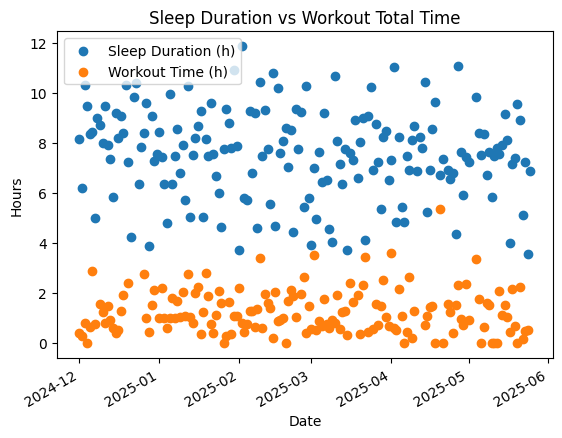

In [354]:
import matplotlib.pyplot as plt

df = merged.copy()
df['SleepHours'] = df['Sleep Duration'].dt.total_seconds() / 3600

fig, ax = plt.subplots()
ax.scatter(df['WorkoutDate'], df['SleepHours'], label='Sleep Duration (h)')
ax.scatter(df['WorkoutDate'], df['TimeTotalInHours'], label='Workout Time (h)')
ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Sleep Duration vs Workout Total Time')
ax.legend()
fig.autofmt_xdate()
plt.show()

Over the past six months, sleep has varied from under five hours to over twelve while daily workouts have remained modest (mostly under two hours), with *no clear linear relationship between how long you exercise and how long you sleep*.

**Total Sleep Time Vs Total Workout Time**

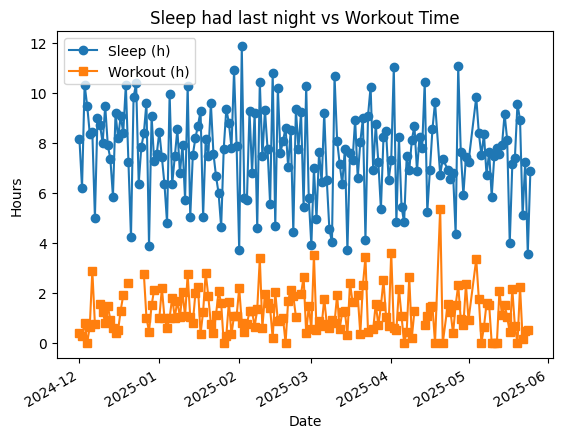

In [355]:
import matplotlib.pyplot as plt

df = merged.sort_values('WorkoutDate')
df['SleepHours'] = df['Sleep Duration'].dt.total_seconds() / 3600

fig, ax = plt.subplots()
ax.plot(df['WorkoutDate'], df['SleepHours'], marker='o', label='Sleep (h)')
ax.plot(df['WorkoutDate'], df['TimeTotalInHours'], marker='s', label='Workout (h)')
ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Sleep had last night vs Workout Time')
ax.legend()
fig.autofmt_xdate()
plt.show()


*They are not correct as the sleep of the day is actually from the previous night* \n
So lets Change this and compare the sleep of the after and the workotus today

**Sleep Hours Last Night vs Workouts Today** 

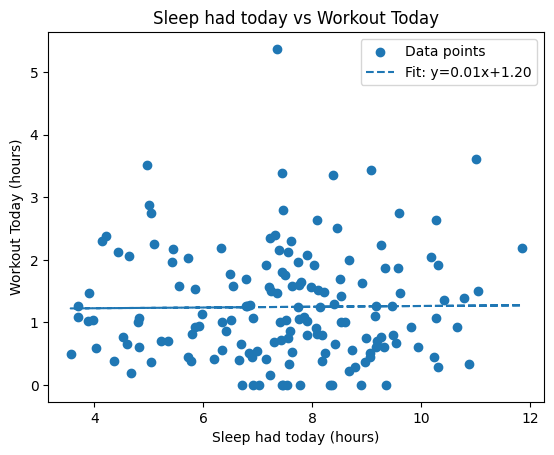

In [356]:
df = merged.copy().sort_values('WorkoutDate')
df['SleepHours'] = df['Sleep Duration'].dt.total_seconds() / 3600
df['SleepTonight'] = df['SleepHours'].shift(-1)
df = df.dropna(subset=['SleepTonight', 'TimeTotalInHours'])

x = df['SleepTonight']
y = df['TimeTotalInHours']

fig, ax = plt.subplots()
ax.scatter(x, y, label='Data points')

m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, '--', label=f'Fit: y={m:.2f}x+{b:.2f}')

ax.set_xlabel("Sleep had Last night (hours)")
ax.set_ylabel("Workout Today (hours)")
ax.set_title("Sleep Hours last night vs Workouts Today")
ax.legend()
plt.show()

The trendline is effectively flat, indicating that daily workout duration is around 1.2 hours regardless of whether i slept 4 hours or 12 hours.

**Deep Sleep Ratio vs Training Stress Score**

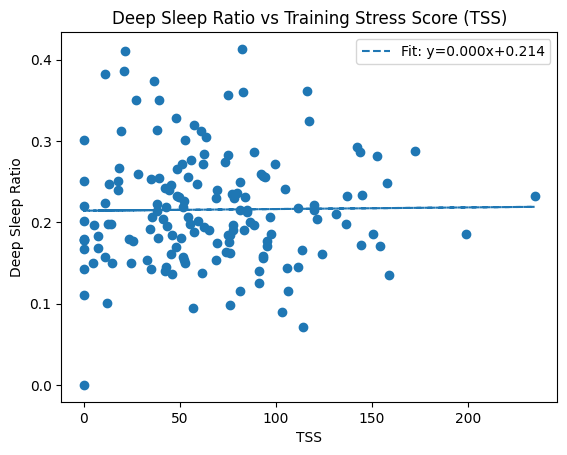

In [357]:

df = merged.copy()

df['DeepSleepRatio'] = (
    df['Deep Sleep Duration'].dt.total_seconds()
    / df['Sleep Duration'].dt.total_seconds()
)

df = df[['TSS', 'DeepSleepRatio']].dropna()


fig, ax = plt.subplots()
ax.scatter(df['TSS'], df['DeepSleepRatio'])

m, b = np.polyfit(df['TSS'], df['DeepSleepRatio'], 1)
ax.plot(df['TSS'], m * df['TSS'] + b, linestyle='--', label=f'Fit: y={m:.3f}x+{b:.3f}')

ax.set_xlabel('TSS')
ax.set_ylabel('Deep Sleep Ratio')
ax.set_title('Deep Sleep Ratio vs Training Stress Score (TSS)')
ax.legend()

plt.show()


*Above there is no correlation between deep sleep and Training Stress score*

**Previous Day TSS vs Deep Sleep Ratio**

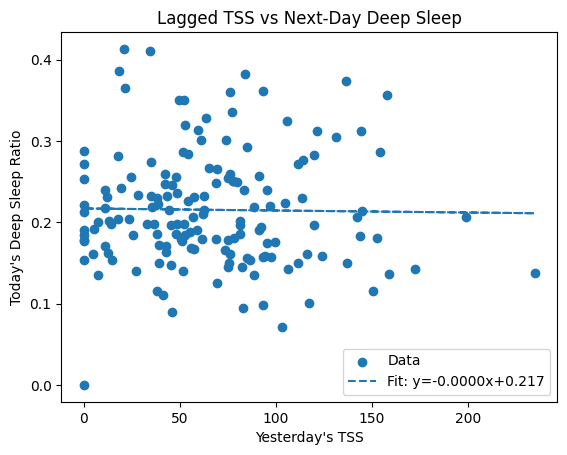

In [358]:
df = merged.copy().sort_values('WorkoutDate')

df['DeepSleepRatio'] = (
    df['Deep Sleep Duration'].dt.total_seconds()
    / df['Sleep Duration'].dt.total_seconds()
)

df['TSS_yesterday'] = df['TSS'].shift(1)
df_clean = df[['TSS_yesterday','DeepSleepRatio']].dropna()

fig, ax = plt.subplots()
ax.scatter(df_clean['TSS_yesterday'], df_clean['DeepSleepRatio'], label="Data")

m, b = np.polyfit(df_clean['TSS_yesterday'], df_clean['DeepSleepRatio'], 1)
ax.plot(df_clean['TSS_yesterday'], m*df_clean['TSS_yesterday'] + b, '--',
        label=f"Fit: y={m:.4f}x+{b:.3f}")

ax.set_xlabel("Yesterday's TSS")
ax.set_ylabel("Today's Deep Sleep Ratio")
ax.set_title("Lagged TSS vs Deep Sleep Ratio")
ax.legend()

plt.show()


*no impact of training load on deep-sleep proportion*

**7-Day Rolling Avg: Training Load Vs Deep Sleep Ratio**

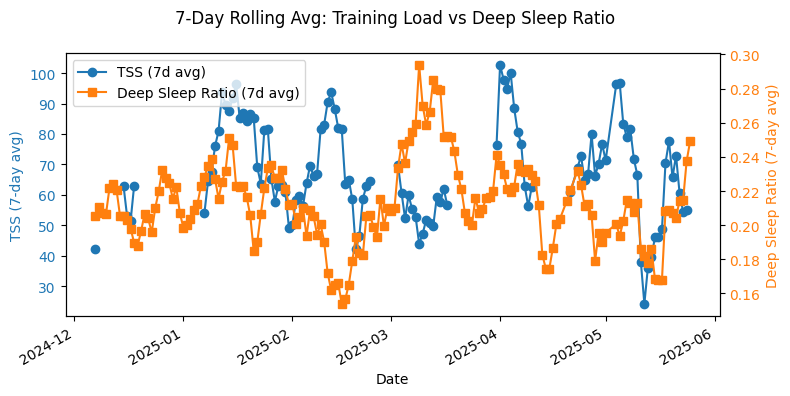

In [372]:
rollingdf = merged.copy().sort_values('WorkoutDate')
rollingdf['DeepSleepRatio'] = (
    rollingdf['Deep Sleep Duration'].dt.total_seconds() /
    rollingdf['Sleep Duration'].dt.total_seconds()
)
rollingdf['TSS_7d']        = rollingdf['TSS'].rolling(window=7, min_periods=7).mean()
rollingdf['DeepRatio_7d'] = rollingdf['DeepSleepRatio'].rolling(window=7, min_periods=7).mean()

fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(rollingdf['WorkoutDate'], rollingdf['TSS_7d'],
         color='tab:blue', marker='o', label='TSS (7d avg)')
ax1.set_xlabel('Date')
ax1.set_ylabel('TSS (7-day avg)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(rollingdf['WorkoutDate'], rollingdf['DeepRatio_7d'],
         color='tab:orange', marker='s', label='Deep Sleep Ratio (7d avg)')
ax2.set_ylabel('Deep Sleep Ratio (7-day avg)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.autofmt_xdate()
fig.suptitle('7-Day Rolling Avg: Training Load vs Deep Sleep Ratio')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

With 7 day rolling averages, spikes in load generally align with dips in deep-sleep ratio, while lighter training blocks see slight rebounds in deep sleep ratio a mild inverse relationship when viewed with a 7day average

**Correlation Matrix**

In [360]:
df = merged.copy().sort_values('WorkoutDate')
df['SleepHoursLastNight'] = (
    df['Sleep Duration'].dt.total_seconds() / 3600
).shift(1)
df['DeepSleepRatio'] = (
    df['Deep Sleep Duration'].dt.total_seconds() /
    df['Sleep Duration'].dt.total_seconds()
)
df['TSS_yesterday'] = df['TSS'].shift(1)

cols = [
    'SleepHoursLastNight',
    'TimeTotalInHours',
    'TSS',
    'TSS_yesterday',
    'DeepSleepRatio',
    'IF',
    'Resting Heart Rate',
    'Avg Overnight HRV'
]

corr = df[cols].corr()
print(corr)


                     SleepHoursLastNight  TimeTotalInHours       TSS  \
SleepHoursLastNight             1.000000         -0.020558 -0.028714   
TimeTotalInHours               -0.020558          1.000000  0.868618   
TSS                            -0.028714          0.868618  1.000000   
TSS_yesterday                   0.055530         -0.110314 -0.112706   
DeepSleepRatio                  0.008142          0.033681  0.013017   
IF                              0.131533         -0.258451  0.125877   
Resting Heart Rate             -0.082332         -0.101865 -0.121816   
Avg Overnight HRV               0.064838          0.168724  0.205140   

                     TSS_yesterday  DeepSleepRatio        IF  \
SleepHoursLastNight       0.055530        0.008142  0.131533   
TimeTotalInHours         -0.110314        0.033681 -0.258451   
TSS                      -0.112706        0.013017  0.125877   
TSS_yesterday             1.000000       -0.015603 -0.033038   
DeepSleepRatio           -0.015

**Spearman HRV and TSS**


*Okay lets use spearman to find the correlation and the p value to the relationship between HRV and TSS*

In [361]:
from scipy.stats import spearmanr

clean = df[['TSS','Avg Overnight HRV']].dropna()
coef, p = spearmanr(clean['TSS'], clean['Avg Overnight HRV'])

print(f"Spearman correlation between TSS and HRV: {coef:.3f}")
print(f"P-value: {p:.3f}")

Spearman correlation between TSS and HRV: 0.219
P-value: 0.011


Weak relationship

**Spearman Training Stress Score Yesterday vs HRV**

In [362]:
df['TSS_yesterday'] = df['TSS'].shift(1)
df_lag = df[['TSS_yesterday', 'Avg Overnight HRV']].dropna()
coef, p = spearmanr(df_lag['TSS_yesterday'], df_lag['Avg Overnight HRV'])
print(f"Spearman correlation between TSS and HRV: {coef:.3f}")
print(f"P-value: {p:.3f}")


Spearman correlation between TSS and HRV: -0.056
P-value: 0.521


no correlation, tss from the prior day does not appear to predict next-day HRV.



**Spearman 7-Day Rolling Avg: Training Stress Score vs HRV**

In [363]:
df['TSS_7d'] = df['TSS'].rolling(window=7, min_periods=7).mean()
df['HRV_7d'] = df['Avg Overnight HRV'].rolling(window=7, min_periods=7).mean()

rolling = df[['TSS_7d', 'HRV_7d']].dropna()
coef, p = spearmanr(rolling['TSS_7d'], rolling['HRV_7d'])

print(f"Spearman ρ: {coef:.3f}")
print(f"P-value: {p:.3f}")

Spearman ρ: 0.300
P-value: 0.002


Better results so lets look at 14d rolling average instead to see if there is a change

**Spearman 14-Day Rolling Avg: Training Stress Score vs HRV**

In [364]:
df['TSS_14d'] = df['TSS'].rolling(window=14, min_periods=14).mean()
df['HRV_14d'] = df['Avg Overnight HRV'].rolling(window=14, min_periods=14).mean()

rolling = df[['TSS_14d', 'HRV_14d']].dropna()
coef, p = spearmanr(rolling['TSS_14d'], rolling['HRV_14d'])

print(f"Spearman ρ: {coef:.3f}")
print(f"P-value: {p:.3f}")

Spearman ρ: 0.446
P-value: 0.000


p value shows that it can not be noise and there is a clear relationship there, lets visualise the relationship over the 14 day period and fit a line

**14-Day Rolling Avg: Training Stress Score vs HRV**

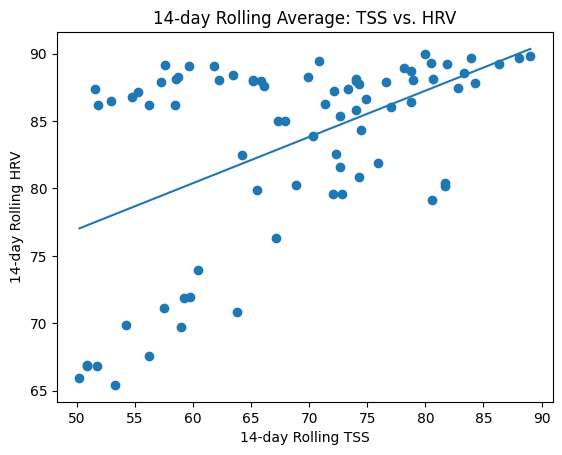

In [365]:
plt.figure()
plt.scatter(rolling['TSS_14d'], rolling['HRV_14d'])

coef = np.polyfit(rolling['TSS_14d'], rolling['HRV_14d'], 1)
poly = np.poly1d(coef)
x_sorted = np.sort(rolling['TSS_14d'])
plt.plot(x_sorted, poly(x_sorted))

plt.xlabel('14-day Rolling TSS')
plt.ylabel('14-day Rolling HRV')
plt.title('14-day Rolling Average: TSS vs. HRV')
plt.show()

*This is not what i expected to happen, where it essentially says the more training done = the better rested i am*

**Spearman 7-Day Rolling Avg: Training Hours VS HRV**

In [370]:
df['TR_7d'] = df['TimeTotalInHours'].rolling(window=7, min_periods=7).mean()
df['HRV_7d'] = df['Avg Overnight HRV'].rolling(window=7, min_periods=7).mean()

rolling = df[['TR_7d', 'HRV_7d','WorkoutDate']].dropna()
coef, p = spearmanr(rolling['TR_7d'], rolling['HRV_7d'])

print(f"Spearman ρ: {coef:.3f}")
print(f"P-value: {p:.3f}")

Spearman ρ: 0.382
P-value: 0.000


**7-Day Rolling Avg: Training Hours vs HRV**

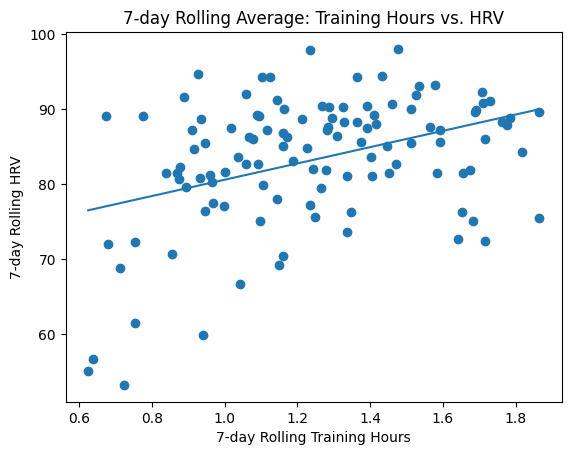

In [367]:
plt.figure()
plt.scatter(rolling['TR_7d'], rolling['HRV_7d'])

coef = np.polyfit(rolling['TR_7d'], rolling['HRV_7d'], 1)
poly = np.poly1d(coef)
x_sorted = np.sort(rolling['TR_7d'])
plt.plot(x_sorted, poly(x_sorted))

plt.xlabel('7-day Rolling Training Hours')
plt.ylabel('7-day Rolling HRV')
plt.title('7-day Rolling Average: Training Hours vs. HRV')
plt.show()


This graph has also shown the same conclusion as before so lets visualise it a bit more 

**7-Day Rolling Avg: Training Hours vs HRV vs Date**

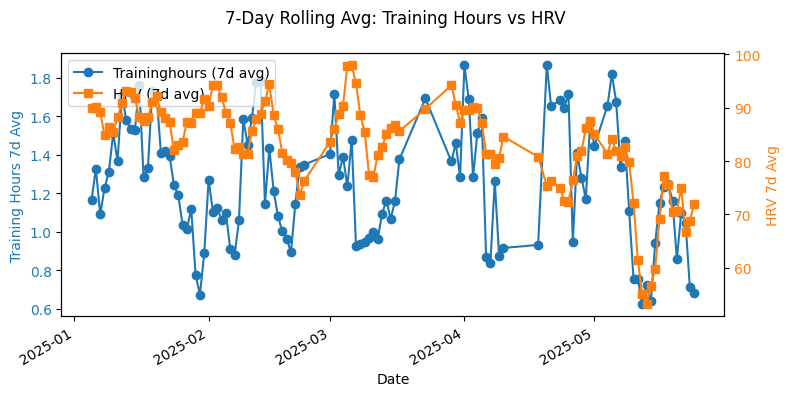

In [368]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.plot(rolling['WorkoutDate'], rolling['TR_7d'],
         color='tab:blue', marker='o', label='Traininghours (7d avg)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Training Hours 7d Avg', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(rolling['WorkoutDate'], rolling['HRV_7d'],
         color='tab:orange', marker='s', label='HRV (7d avg)')
ax2.set_ylabel('HRV 7d Avg', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

fig.autofmt_xdate()
fig.suptitle('7-Day Rolling Avg: Training Hours vs HRV')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

**Intensity Factor vs HRV**

In [374]:
df['TR_7d'] = df['IF'].rolling(window=7, min_periods=7).mean()
df['HRV_7d'] = df['Avg Overnight HRV'].rolling(window=7, min_periods=7).mean()

rolling = df[['TR_7d', 'HRV_7d','WorkoutDate']].dropna()
coef, p = spearmanr(rolling['TR_7d'], rolling['HRV_7d'])

print(f"Spearman ρ: {coef:.3f}")
print(f"P-value: {p:.3f}")

Spearman ρ: 0.040
P-value: 0.721
